In [194]:
import pandas as pd
df = pd.read_csv("Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


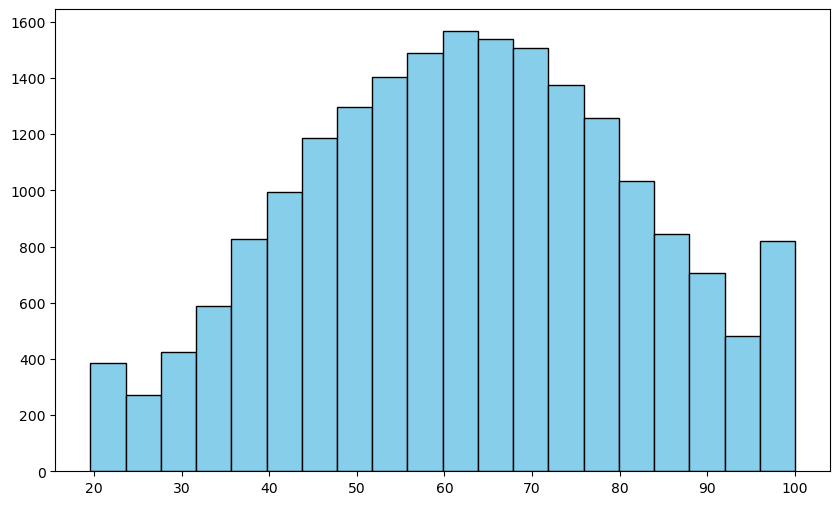

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df["exam_score"], bins=20, edgecolor='black', color='skyblue')
plt.show()

In [196]:
df.describe().round(3)

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,10000.505,20.473,4.008,70.017,7.009,62.513
std,5773.655,2.284,2.308,17.282,1.732,18.908
min,1.000,17.000,0.080,40.600,4.100,19.599
25%,5000.750,18.000,2.000,55.100,5.500,48.800
50%,10000.500,20.000,4.040,69.900,7.000,62.600
75%,15000.250,22.000,6.000,85.000,8.500,76.300
max,20001.000,24.000,7.910,99.400,9.900,100.000


In [197]:
facility = ['low', 'medium', 'high']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [facility])
df['facility_rating'] = enc.fit_transform(df[['facility_rating']])

In [198]:
exam_diff = ['easy', 'moderate', 'hard']
enc = OrdinalEncoder(categories = [exam_diff])
df['exam_difficulty'] = enc.fit_transform(df[['exam_difficulty']])

In [199]:
sleep = ['poor', 'average', 'good']
enc = OrdinalEncoder(categories = [sleep])
df['sleep_quality'] = enc.fit_transform(df[['sleep_quality']])

In [200]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,0.0,coaching,0.0,2.0,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,1.0,online videos,1.0,1.0,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,0.0,coaching,2.0,1.0,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,1.0,online videos,0.0,1.0,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,0.0,coaching,0.0,1.0,43.7


In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["internet_access"] = le.fit_transform(df["internet_access"])
df["study_method"] = le.fit_transform(df["study_method"]) 

course_rank = {
    'diploma': 0,  
    'ba': 1,       
    'b.com': 1,    
    'bba': 1,      
    'bca': 2,      
    'b.sc': 2,     
    'b.tech': 3    
}

df['course_code'] = df['course'].map(course_rank)

df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,course_code
0,1,17,1,diploma,2.78,92.9,1,7.4,0.0,0,0.0,2.0,58.9,0
1,2,23,2,bca,3.37,64.8,1,4.6,1.0,3,1.0,1.0,54.8,2
2,3,22,1,b.sc,7.88,76.8,1,8.5,0.0,0,2.0,1.0,90.3,2
3,4,20,2,diploma,0.67,48.4,1,5.8,1.0,3,0.0,1.0,29.7,0
4,5,20,0,diploma,0.89,71.6,1,9.8,0.0,0,0.0,1.0,43.7,0


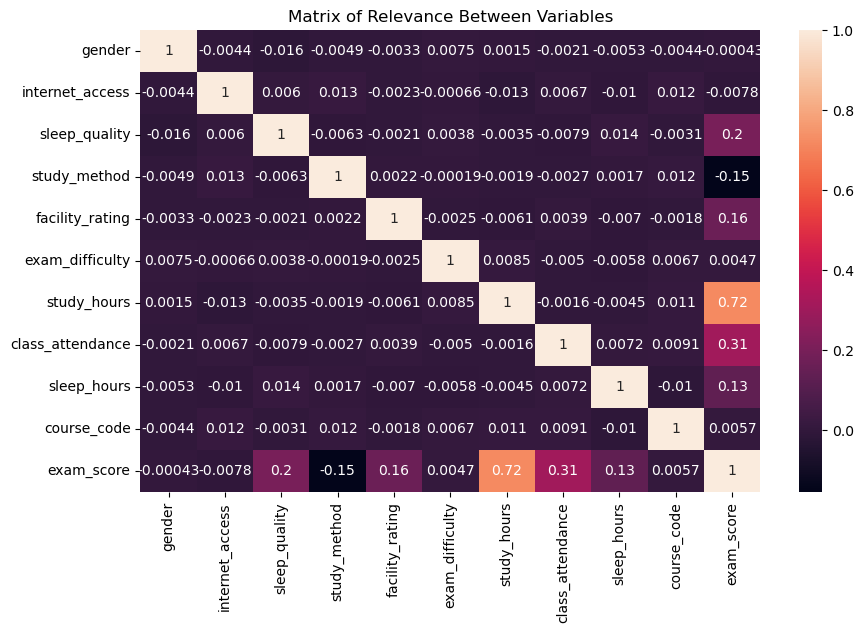

In [202]:
numerical_data = df[["gender","internet_access","sleep_quality","study_method","facility_rating","exam_difficulty","study_hours","class_attendance","sleep_hours","course_code","exam_score"]]
correlation = numerical_data.corr()

import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Matrix of Relevance Between Variables")
sns.heatmap(correlation,annot=True)
plt.show()

In [203]:
X = df[["sleep_quality","study_method","facility_rating","study_hours","class_attendance","sleep_hours"]]
y = df[["exam_score"]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)
print("The shape of the train set ",X_train.shape)
print("The shape of the test set ",X_test.shape)

The shape of the train set  (16000, 6)
The shape of the test set  (4000, 6)


In [204]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2):{score*100:.2f}")

The score of the model (R^2):71.94


In [207]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2):{score*100:.2f}")

The score of the model (R^2):71.94
